# Exploring Data Pathologies in Conjoint Studies

*The effect of pathological behavior on HBMNL models*

In [1]:
from PYTHON import utils
from PYTHON import stan_utility
import matplotlib.pyplot as plt
import pystan
import numpy as np
%matplotlib inline

plt.style.use("./analysis.mplstyle")

In [12]:
import importlib
importlib.reload(utils)

<module 'PYTHON.utils' from '/Users/derekmiller/repos/clever-randomization/PYTHON/utils.py'>

*generate data and build models*

In [13]:
# initialize dictionaries to store the various models, data, and fit objects
DATA = dict()
MODEL = dict()
FIT = dict()

In [14]:
model_list = ['mnl_relu', 'mnl_fhorseshoe']

# generate data
DATA['screening_random'] = utils.generate_simulated_data(pathology_type='screening_random')

# get models
for m in model_list:
    MODEL[m] = utils.get_model(model_name=m)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f1ea3616d9ae30be473a56af78ca9b3d NOW.


## Results

In [15]:
# fit model
m = 'mnl_relu'
d = 'screening_random'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], control={'adapt_delta':.9})

Results for fit mnl_relu|screening_random


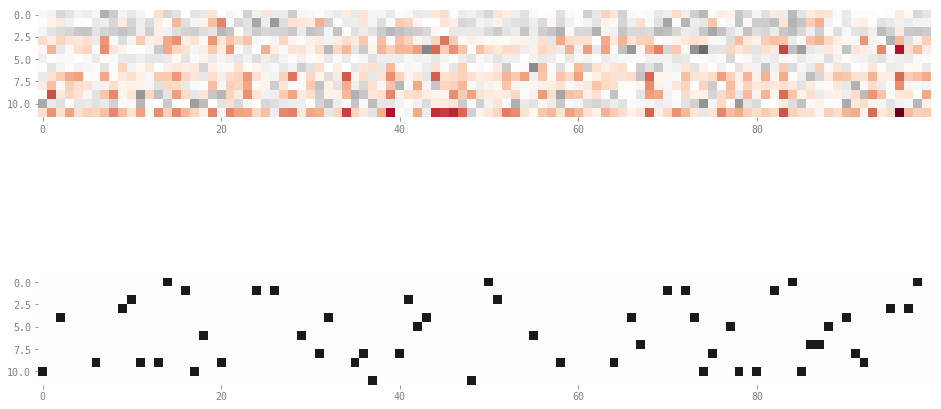

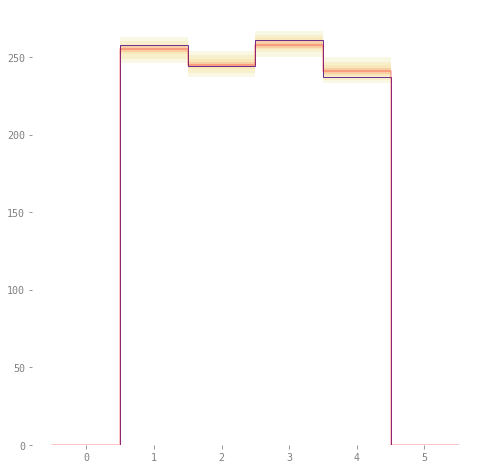

In [16]:
# plot results
print("Results for fit {0}".format(f))
B = FIT[f].extract(pars=['B'])['B'][-1].T
utils.plot_betas(B, DATA[d]['B'])

utils.plot_ppc(DATA[d], FIT[f])

In [10]:
stan_utility.check_all_diagnostics(FIT[f])

n_eff / iter looks reasonable for all parameters
Rhat for parameter L_Omega[1,1] is nan!
Rhat for parameter L_Omega[1,2] is nan!
Rhat for parameter L_Omega[1,3] is nan!
Rhat for parameter L_Omega[2,3] is nan!
Rhat for parameter L_Omega[1,4] is nan!
Rhat for parameter L_Omega[2,4] is nan!
Rhat for parameter L_Omega[3,4] is nan!
Rhat for parameter L_Omega[1,5] is nan!
Rhat for parameter L_Omega[2,5] is nan!
Rhat for parameter L_Omega[3,5] is nan!
Rhat for parameter L_Omega[4,5] is nan!
Rhat for parameter L_Omega[1,6] is nan!
Rhat for parameter L_Omega[2,6] is nan!
Rhat for parameter L_Omega[3,6] is nan!
Rhat for parameter L_Omega[4,6] is nan!
Rhat for parameter L_Omega[5,6] is nan!
Rhat for parameter L_Omega[1,7] is nan!
Rhat for parameter L_Omega[2,7] is nan!
Rhat for parameter L_Omega[3,7] is nan!
Rhat for parameter L_Omega[4,7] is nan!
Rhat for parameter L_Omega[5,7] is nan!
Rhat for parameter L_Omega[6,7] is nan!
Rhat for parameter L_Omega[1,8] is nan!
Rhat for parameter L_Omega[2,8]